In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Integer

In [3]:
#pip install numpy==1.19.5

In [4]:
# Importing unnormalized data from pre-processing

X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_asthma")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_asthma")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_asthma")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_asthma")

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 12) (54242, 2) (18081, 12) (18081, 2)


In [6]:
print(type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [7]:
y_train.head()

CensusTract  Asthma_prevalence
0  29099700210               10.0
1  51059416300                8.6
2  37119005306               10.8
3   6037218220               10.2
4  54107010701               11.9

In [8]:
X_train.head()

CensusTract       PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
0  29099700210   8.763657  45.991934  0.494840      34.338281  0.453526   
1  51059416300   8.328183  43.057112  0.452108      31.484862  0.432924   
2  37119005306   9.040740  46.273464  0.676712      40.401278  0.565504   
3   6037218220  12.104972  48.742711  0.796252      47.287164  0.736157   
4  54107010701   8.448426  41.204610  0.156130      26.989580  0.351422   

         PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF     PWDIS  
0   328.512231    0.147066  0.182929  0.287387  2.058762  0.000030  
1     9.794814    0.301107  0.135700  0.272942  0.444900  0.006789  
2   844.242840    0.107195  0.061711  0.751714  3.498016  0.000001  
3  3331.581828    0.675725  0.093042  0.156472  9.566426  0.000876  
4    35.609543    0.202061  0.065727  0.063606  0.181672  0.000628

In [9]:
# Re-indexing

X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)
y_test.drop("CensusTract", axis=1, inplace=True)
y_train.drop("CensusTract", axis=1, inplace=True)

In [10]:
# Getting the y-data into correct shape for model

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 11) (54242,) (18081, 11) (18081,)


In [11]:
X_train.head()

PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
CensusTract                                                            
29099700210   8.763657  45.991934  0.494840      34.338281  0.453526   
51059416300   8.328183  43.057112  0.452108      31.484862  0.432924   
37119005306   9.040740  46.273464  0.676712      40.401278  0.565504   
6037218220   12.104972  48.742711  0.796252      47.287164  0.736157   
54107010701   8.448426  41.204610  0.156130      26.989580  0.351422   

                   PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF     PWDIS  
CensusTract                                                                   
29099700210   328.512231    0.147066  0.182929  0.287387  2.058762  0.000030  
51059416300     9.794814    0.301107  0.135700  0.272942  0.444900  0.006789  
37119005306   844.242840    0.107195  0.061711  0.751714  3.498016  0.000001  
6037218220   3331.581828    0.675725  0.093042  0.156472  9.566426  0.000876  
54107010701    35.609543    0.202061  0.065727  0.063606  0.181672  0.000628

#### In the EDA notebook, I have already done multiple linear regression with OLS and found no reasonable correlation. 

In [31]:
# Instantiating RandomForestRegressor with default hyperparameters

rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred = rf.predict(X_test)

In [33]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5538174838351156
MAE: 0.7502191250483934
MSE: 1.0615335166196562
RMSE: 1.030307486442594


#### This R<sup>2</sup> value is too low for this to be a reasonable fit.

In [75]:
# Instantiating RandomForestRegressor and using RandomizedSearch to get best values for n_estimators and max_depth

rf = RandomForestRegressor() 
params = {"n_estimators":range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [ ]:
rs.fit(X_train, y_train)   

In [12]:
rs.best_estimator_

RandomForestRegressor(max_depth=29, n_estimators=401)

In [28]:
y_pred = rs.predict(X_test)

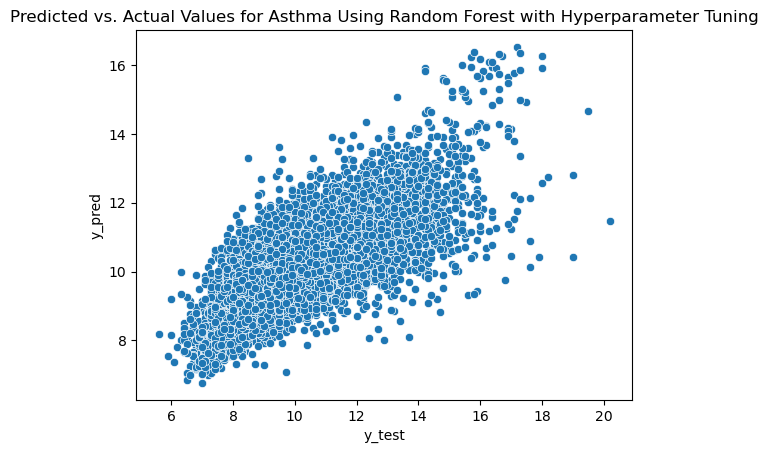

In [29]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Asthma Using Random Forest with Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [30]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5553708148321812
MAE: 0.7489252481394579
MSE: 1.0578379148063841
RMSE: 1.0285124767383156


#### The hyperparameter tuning did not make much different in the R<sup>2</sup> value.

In [ ]:
# Instantiating AdaBoostRegressor with default hyperparameters

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = ada.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.03404484159174981
MAE: 1.3675407630942722
MSE: 3.419808487689778
RMSE: 1.8492724211672487


### Adaboost with the default hyperparameters does not give reasonable results.

In [69]:
# Instantiating AdaBoost Regressor and using RandomizedSearch to get best values for best n_estimators and learning rate

ada = AdaBoostRegressor()
params = {"n_estimators":range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [70]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [71]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=4.0009999999999994, n_estimators=62)

In [73]:
y_pred = rs.predict(X_test)

In [74]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.4494104331903319
MAE: 1.5525605459500058
MSE: 3.448359580278067
RMSE: 1.8569759234513696


### The hyperparameter tuning just made this model worse.

In [ ]:
# Instantiating GradientBoostRegressor with default parameters

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.26896822936933873
MAE: 1.1164367105044624
MSE: 2.417679150282576
RMSE: 1.5548887903263615


### This R<sup>2</sup> is not as good as Random Forest. 

In [62]:
# Instantiating GradientBoostingRegressor and using RandomizedSearch to get best values for n_estimators, max_leaf_nodes, and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators":range(1,500), "max_leaf_nodes":range(2,100), "learning_rate":np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [63]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [65]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=67,
                          n_estimators=496)

In [67]:
y_pred = rs.predict(X_test)

In [68]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.24434855783678666
MAE: 1.0098229389919684
MSE: 1.7978053905675693
RMSE: 1.3408226544057082


### The R<sup>2</sup> value is worse than with the default parameters

In [ ]:
# Instantiating XGBRegressor with default parameters

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.37715857323054647
MAE: 1.0228488650041294
MSE: 2.0598704350888597
RMSE: 1.4352248726554524


### The R<sup>2</sup> is not as good as Random Forest.

In [34]:
# Instantiating XGBRegressor and using RandomizedSearch to get best values for max_depth, min_child_weight, and gamma

xgb = XGBRegressor()
params = {"max_depth":range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [35]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [36]:
rs.best_params_

{'min_child_weight': 91, 'max_depth': 158, 'gamma': 3}

In [52]:
y_pred = rs.predict(X_test)

In [53]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5560134943931305
MAE: 0.7677380264718529
MSE: 1.0860426487435557
RMSE: 1.042133700032561


### This is better than XGBoost without tuning the hyperparameters and slighting better than Random Forest. 

In [12]:
# Trying Bayesian search for XGBoost hyperparameters

opt = BayesSearchCV(XGBRegressor(), {"max_depth":Integer(1,200), "min_child_weight":Integer(1,200), "gamma":Integer(1,200)}, n_iter=32, random_state=0)
_ = opt.fit(X_train, y_train)

In [13]:
opt.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=137, max_leaves=None,
             min_child_weight=32, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
y_pred = opt.predict(X_test)

In [17]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5638485157052466
MAE: 0.756373569734737
MSE: 1.0668772750411684
RMSE: 1.0328975142971195


### This is slightly better than XGBoost with hyperparameters determined by RandomizedSearchCV and the best model so far.

In [49]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_lambda

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha":np.arange(1e-3,100), "reg_lambda":np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [50]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [51]:
rs.best_estimator_

LGBMRegressor(reg_alpha=23.000999999999998, reg_lambda=26.000999999999998)

In [53]:
y_pred = rs.predict(X_test)

In [54]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4351320284143102
MAE: 0.8662017679851695
MSE: 1.3439035878348509
RMSE: 1.1592685572527406


### Not as good as XGBoost. 

#### The next model chosen is a support vector machine regressor, which requires normalized data.

In [13]:
# Importing data normalized by power transformer from pre-processing

X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_asthma")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_asthma")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_asthma")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_asthma")
X_train_log.head()

CensusTract       PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
0  41039002001   8.981880  38.796907 -0.671723      -0.107404  0.174169   
1  39049007710   9.220859  44.485425  1.008017      -0.137535 -0.047502   
2  37183054012   8.956142  43.623624  0.167170       0.670834  0.497545   
3  24003702702   8.418960  46.352799  0.521747      -0.002043 -0.041971   
4  42003090200  10.682403  46.767405  0.799661       0.842810 -0.098120   

      PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  
0 -0.068513   -0.930455 -1.046432  1.439043 -0.964549  
1 -0.145120    1.250908  0.503349 -0.856538  0.814682  
2 -0.353382   -1.240113  0.092336 -0.685666  0.290969  
3 -0.867872    0.071600 -0.220362 -0.254194 -0.657852  
4  0.654296    1.592945 -0.204237  1.188640  1.188099

In [14]:
# Getting rid of extra column

X_train_log.set_index("CensusTract", inplace=True)

In [15]:
X_train_log.head()

PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
CensusTract                                                            
41039002001   8.981880  38.796907 -0.671723      -0.107404  0.174169   
39049007710   9.220859  44.485425  1.008017      -0.137535 -0.047502   
37183054012   8.956142  43.623624  0.167170       0.670834  0.497545   
24003702702   8.418960  46.352799  0.521747      -0.002043 -0.041971   
42003090200  10.682403  46.767405  0.799661       0.842810 -0.098120   

                PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  
CensusTract                                                      
41039002001 -0.068513   -0.930455 -1.046432  1.439043 -0.964549  
39049007710 -0.145120    1.250908  0.503349 -0.856538  0.814682  
37183054012 -0.353382   -1.240113  0.092336 -0.685666  0.290969  
24003702702 -0.867872    0.071600 -0.220362 -0.254194 -0.657852  
42003090200  0.654296    1.592945 -0.204237  1.188640  1.188099

In [16]:
X_test_log.head()

CensusTract       PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
0  36119983000   7.074638  42.166033  0.240349      -0.768691 -0.884905   
1  55043961200   7.604254  41.370808 -0.698165      -1.272752 -1.308992   
2  48183001100   9.387155  40.328075 -0.257137       2.669413  1.076204   
3   6037603301  12.219432  42.449469  0.961164       0.569403  0.822581   
4  39035115200   9.573855  43.904891  1.108465      -0.192570  0.066926   

      PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  
0  1.206152   -1.469238 -0.204168 -1.119051 -0.258725  
1 -0.430433    0.322640  0.377696 -0.778572 -0.814714  
2  0.320084    0.818817  1.035467  1.044083 -0.081051  
3  1.172007    0.573880  1.965102  1.358814  1.712343  
4  0.369116    1.573150 -0.908496  1.750363  1.694619

In [17]:
# Getting rid of extra column

X_test_log  = X_test_log.set_index("CensusTract")
X_test_log.head()

PM25      OZONE  DieselPM  AirToxicsRisk      RESP  \
CensusTract                                                            
36119983000   7.074638  42.166033  0.240349      -0.768691 -0.884905   
55043961200   7.604254  41.370808 -0.698165      -1.272752 -1.308992   
48183001100   9.387155  40.328075 -0.257137       2.669413  1.076204   
6037603301   12.219432  42.449469  0.961164       0.569403  0.822581   
39035115200   9.573855  43.904891  1.108465      -0.192570  0.066926   

                PTRAF  PRE1960PCT      PNPL      PRMP     PTSDF  
CensusTract                                                      
36119983000  1.206152   -1.469238 -0.204168 -1.119051 -0.258725  
55043961200 -0.430433    0.322640  0.377696 -0.778572 -0.814714  
48183001100  0.320084    0.818817  1.035467  1.044083 -0.081051  
6037603301   1.172007    0.573880  1.965102  1.358814  1.712343  
39035115200  0.369116    1.573150 -0.908496  1.750363  1.694619

In [18]:
y_train_log.head()

Unnamed: 0         0
0           0  0.906918
1           1  1.456697
2           2 -2.189433
3           3 -1.540027
4           4 -0.390535

In [19]:
# Getting rid of extra column

y_train_log.drop("Unnamed: 0", axis=1, inplace=True)
y_test_log.drop("Unnamed: 0", axis=1, inplace=True)
print(y_train_log.shape, y_test_log.shape)

(54242, 1) (18081, 1)


In [20]:
# Getting the y-data into correct shape for model

y_train_log = np.array(y_train_log)
y_train_log = y_train_log.ravel()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.ravel()
print(y_train_log.shape, y_test_log.shape)

(54242,) (18081,)


In [39]:
# Instantiating support vector machine regressor and using RandomizedSearch to get best values for C and epsilon.

svm = SVR()
params = {"C":np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [40]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [41]:
svm_rs.best_estimator_

SVR(C=4.01, epsilon=1.0001)

In [56]:
y_pred = svm_rs.predict(X_test_log)

In [58]:
print("R2 score:", r2_score(y_test_log, y_pred)  )
print("MAE:", mean_absolute_error(y_test_log, y_pred))
print("MSE:", mean_squared_error(y_test_log, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_log, y_pred)))

R2 score: 0.193467482621137
MAE: 0.7031922051783431
MSE: 0.8131707806714181
RMSE: 0.9017598242721939


### The very low R<sup>2</sup> value shows that SVM regression is not a good predictor for this data.

## XGBoost with hyperparameters from Bayesian search gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for XGBoost to be a reasonable model.